#### This Project seeks to develop a model (Classification model) that will enable detection of fraudulent credit card transacions.  Is a synthetic dataset from kaggle via a STIMULATOR given the intrinsic private nature of financial transactions
####  Below is the Data Dictionary:
####  step               - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
####  type               - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
####  amount          - amount of the transaction in local currency.
####  nameOrig      - customer who started the transaction
####  oldbalanceOrig   - initial balance before the transaction
####  newbalanceOrig  - new balance after the transaction.
####  nameDest             - customer who is the recipient of the transaction
####  oldbalnceDest   - initial balance recipient before the transaction. Note that there is no information for customers that start with M 
####  newbalanceDest  - new balance recipient after the transaction. Note that there is no information for customers that start with M 
####  isFraud                 - This is the transactions made by the fraudulent agents inside the simulation.
####  isFlaggedFraud   - The business model aims to control massive transfers from one account to another and flags illegal attempts. ####                                   An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction

In [1]:
# To bring in the libraries
import pandas as pd
import numpy as np

In [2]:
# To bring in the dataset
df = pd.read_excel(r"C:\Users\user\Desktop\data source\fraud_detection_creditcard.xlsx")

In [3]:
# To check the top end of the data
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
# To check for number of rows and columns
print(('There are {} rows and {} columns').format(df.shape[0], df.shape[1]))

There are 2500 rows and 11 columns


In [5]:
# To check the general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            2500 non-null   int64  
 1   type            2500 non-null   object 
 2   amount          2500 non-null   float64
 3   nameOrig        2500 non-null   object 
 4   oldbalanceOrg   2500 non-null   float64
 5   newbalanceOrig  2500 non-null   float64
 6   nameDest        2500 non-null   object 
 7   oldbalanceDest  2500 non-null   float64
 8   newbalanceDest  2500 non-null   float64
 9   isFraud         2500 non-null   int64  
 10  isFlaggedFraud  2500 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 215.0+ KB


In [6]:
# To check for missing values. No missing values in the dataset
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
# To get the categorial variables
cat_var = [col for col in df.columns if df[col].dtypes == 'O']
print(cat_var)

['type', 'nameOrig', 'nameDest']


In [8]:
# To get the numerical variables
num_var = [col for col in df.columns if df[col].dtypes != 'O']
print(num_var)

['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [9]:
# To obtain the length/count of unique values in each column
for col in df.columns:
    values = df[col].nunique()
    print(f'{col}:{values}')

step:1
type:5
amount:2492
nameOrig:2500
oldbalanceOrg:1863
newbalanceOrig:1521
nameDest:1519
oldbalanceDest:1187
newbalanceDest:201
isFraud:2
isFlaggedFraud:1


In [10]:
# To obatin the unique values contained in the different columns in the dataset
for col in df.columns:
    values = df[col].unique()
    print(f'{col}:{values}')

step:[1]
type:['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
amount:[ 9839.64  1864.28   181.   ... 11335.23   924.07  7677.95]
nameOrig:['C1231006815' 'C1666544295' 'C1305486145' ... 'C82517097' 'C721648892'
 'C1150436743']
oldbalanceOrg:[170136.    21249.      181.   ...  10537.    21898.    45881.29]
newbalanceOrig:[160296.36  19384.72      0.   ... 266267.36  20973.93  38203.34]
nameDest:['M1979787155' 'M2044282225' 'C553264065' ... 'M1943266645' 'C115939475'
 'M407241000']
oldbalanceDest:[     0.    21182.    41898.   ... 241220.25   6830.83  20955.  ]
newbalanceDest:[0.00000000e+00 4.03487900e+04 1.57982120e+05 5.15134400e+04
 1.68967000e+04 2.71917289e+06 1.69972200e+04 2.41516000e+03
 6.41061800e+04 6.45343091e+06 8.38329000e+03 4.98643600e+04
 2.40441800e+04 9.65870050e+05 2.22336500e+04 2.77515050e+05
 3.42010309e+06 1.91692049e+07 5.51576334e+06 1.65183600e+04
 2.10777811e+06 4.64622300e+04 9.94033929e+06 1.09636600e+04
 9.55089500e+04 4.68207100e+04 1.17880814e+06 9.71

In [11]:
# To check for duplicates 
df.duplicated().sum()

0

In [12]:
# To get a sample of the dataset in a bid to have a sense of the cleaning work required
df.sample(10).T

,2072,2000,1768,939,1124,1918,799,362,1409,52
step,1,1,1,1,1,1,1,1,1,1
type,PAYMENT,PAYMENT,PAYMENT,CASH_IN,DEBIT,PAYMENT,TRANSFER,TRANSFER,PAYMENT,PAYMENT
amount,2548.85,4613.1,5088.99,5221.77,6765.12,2873.37,348186.2,1457213.54,1815.83,2330.64
nameOrig,C2082545616,C403960809,C1532409428,C164714495,C67620673,C594916129,C706665172,C396918327,C1862674654,C816944408
oldbalanceOrg,22186.0,1566862.94,26760.0,1046.0,50317.0,0.0,0.0,0.0,383563.24,203543.0
newbalanceOrig,19637.15,1562249.83,21671.01,6267.77,43551.88,0.0,0.0,0.0,381747.41,201212.36
nameDest,M117460541,M684429600,M1160546880,C317071334,C1122805102,M1537912396,C306206744,C1590550415,M1068232840,M909132503
oldbalanceDest,0.0,0.0,0.0,0.0,16803.8,0.0,774212.55,10937223.86,0.0,0.0
newbalanceDest,0.0,0.0,0.0,139555.44,23568.91,0.0,3554299.27,19169204.93,0.0,0.0
isFraud,0,0,0,0,0,0,0,0,0,0


In [13]:
# After review of datatset it seems all is good for the next phase, being EDA

##### This section deals with Exploratory Data Analysis (EDA). Univariate Analysis wlll be done on the features.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

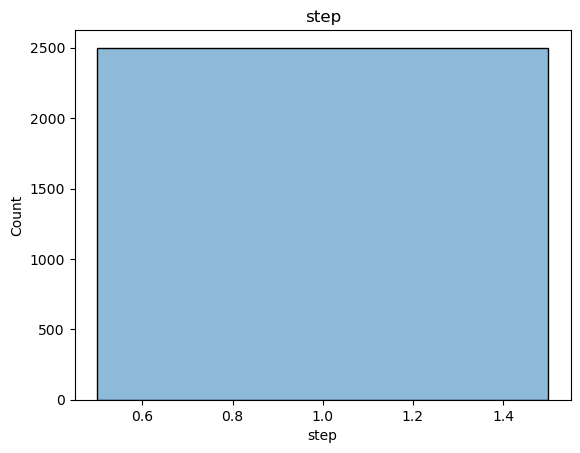

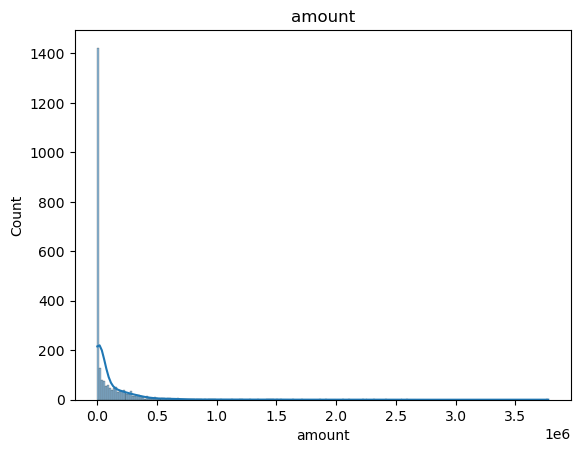

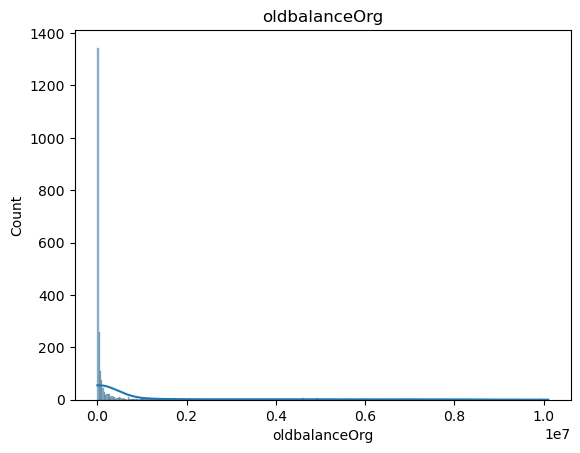

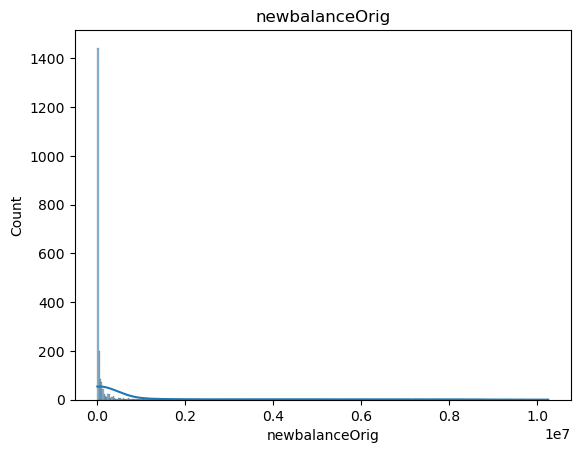

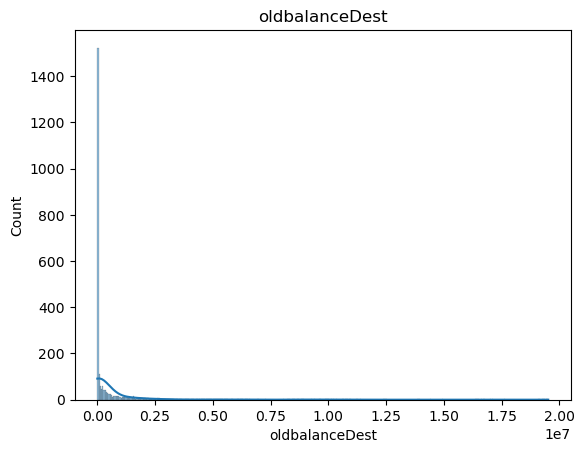

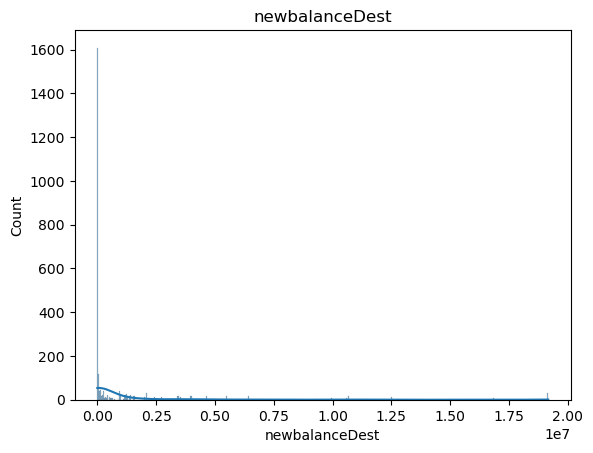

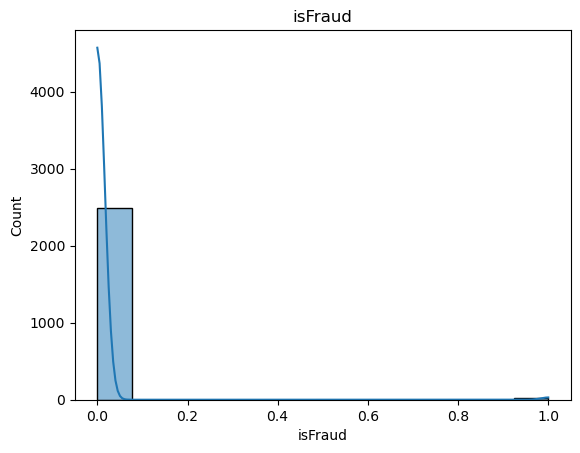

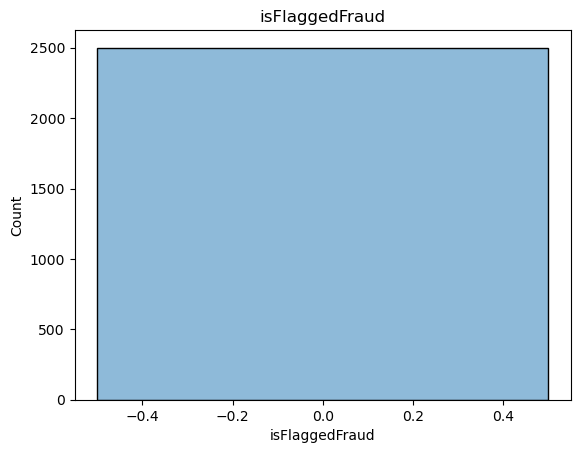

In [15]:
numeric_features = [numeric for numeric in df.columns if df[numeric].dtypes!='O']
for features in numeric_features:
        sns.histplot(df[features], kde = True)
        plt.title(features)
        plt.show()

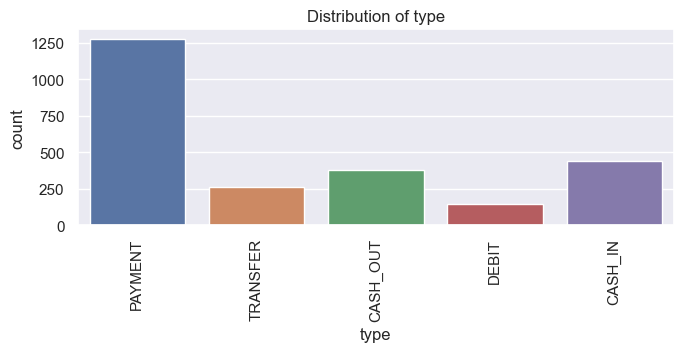

In [17]:
# For the categorical colunms, a univairate analysis is also done
# Countplot is adopted to better undersand them

sns.set(rc = {'figure.figsize':(7,3)})
sns.countplot(x ='type', data = df)
plt.title('Distribution of type')
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

In [18]:
# After review of the Univariate Analysis is clear some colums will be dropped as they are not germane to the task

df.drop(['step', 'nameOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud'], axis = 1, inplace = True)

In [19]:
# To confirm the new df
df

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,PAYMENT,9839.64,170136.00,160296.36,0
1,PAYMENT,1864.28,21249.00,19384.72,0
2,TRANSFER,181.00,181.00,0.00,1
3,CASH_OUT,181.00,181.00,0.00,1
4,PAYMENT,11668.14,41554.00,29885.86,0
...,...,...,...,...,...
2495,CASH_IN,276273.67,922.00,277195.67,0
2496,PAYMENT,10928.31,277195.67,266267.36,0
2497,PAYMENT,11335.23,10537.00,0.00,0
2498,DEBIT,924.07,21898.00,20973.93,0


###### This section deals  Bivariate Analysis looking  at the relationship between the input numerical variables and the target variable. A Person-r correlation and a Scatterplot are adopted.

In [20]:
# To bring in the stat library
from scipy import stats
import statistics as stat

In [21]:
# To create a DataFrame for the correlation value and p-value as well as the target variable and other features that are numerical.
corr_df = pd.DataFrame(columns = ['correlation(r)', 'p-value(p)'])
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]) and col!= 'isFraud':
        r, p = stats.pearsonr(df['isFraud'], df[col])
        r = round(r,3)
        p = round(p,3)
        corr_df.loc[col] = [r, p]
    corr_df 


In [22]:
corr_df

,correlation(r),p-value(p)
amount,0.044,0.029
oldbalanceOrg,-0.026,0.199
newbalanceOrig,-0.034,0.091


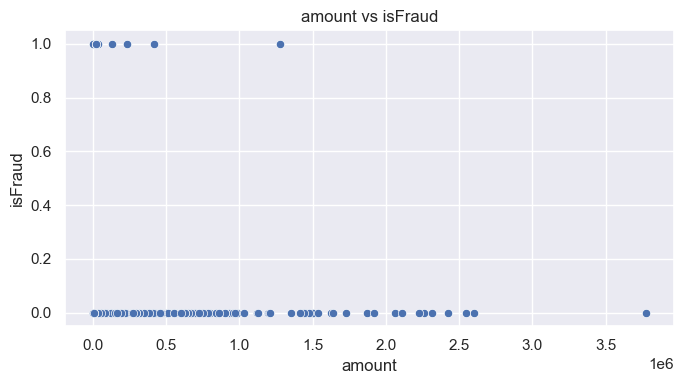

In [23]:
plt.figure(figsize = (7,4))
sns.scatterplot(data = df, x = 'amount', y = 'isFraud')
plt.title('amount vs isFraud')
plt.tight_layout()
plt.show()

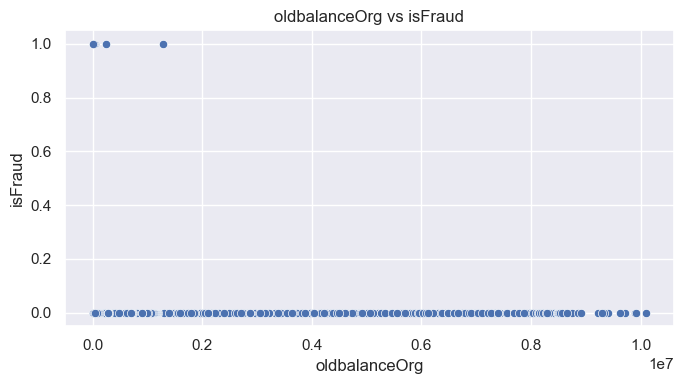

In [24]:
plt.figure(figsize = (7,4))
sns.scatterplot(data = df, x = 'oldbalanceOrg', y = 'isFraud')
plt.title('oldbalanceOrg vs isFraud')
plt.tight_layout()
plt.show()

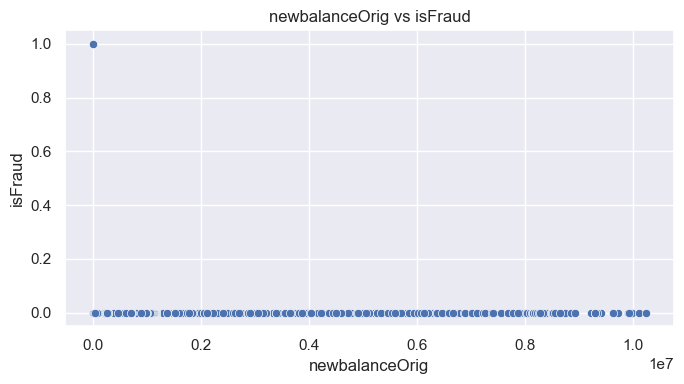

In [25]:
plt.figure(figsize = (7,4))
sns.scatterplot(data = df, x = 'newbalanceOrig', y = 'isFraud')
plt.title('newbalanceOrig vs isFraud')
plt.tight_layout()
plt.show()

In [26]:
# Still on Bivariate Analysis, however, since the categorical variable has 4 groups, a mannwhitneyu is used to test the taregt variable
from scipy.stats import mannwhitneyu

In [27]:
def perform_mannwhitneyu(df, feature, target):
    # Get unique categories in the feature
    categories = df[feature].unique()

    # Dictionary to store Mann-Whitney U test results
    results = {}

    # Perform Mann-Whitney U test for each category
    for category in categories:
        group_1 = df[df[feature] == category][target]
        group_0 = df[df[feature] != category][target]
        
        # Perform Mann-Whitney U test
        stat, p_value = mannwhitneyu(group_0, group_1, alternative='two-sided')
        
        # Store results
        results[category] = {'Mann-Whitney U Statistic': stat, 'P-value': p_value}

    return results

In [28]:
# Call the function
results = perform_mannwhitneyu(df, 'type', 'isFraud')

# Display the results
for category, result in results.items():
    print(f"\nResults for {category}:")
    print(f"Mann-Whitney U Statistic: {result['Mann-Whitney U Statistic']}")
    print(f"P-value: {result['P-value']}")


Results for PAYMENT:
Mann-Whitney U Statistic: 791082.0
P-value: 4.082540860409618e-05

Results for TRANSFER:
Mann-Whitney U Statistic: 282532.0
P-value: 1.0412449898625187e-05

Results for CASH_OUT:
Mann-Whitney U Statistic: 395467.5
P-value: 4.702268014892985e-06

Results for DEBIT:
Mann-Whitney U Statistic: 168554.0
P-value: 0.3250561303293741

Results for CASH_IN:
Mann-Whitney U Statistic: 457537.5
P-value: 0.06338114361263725


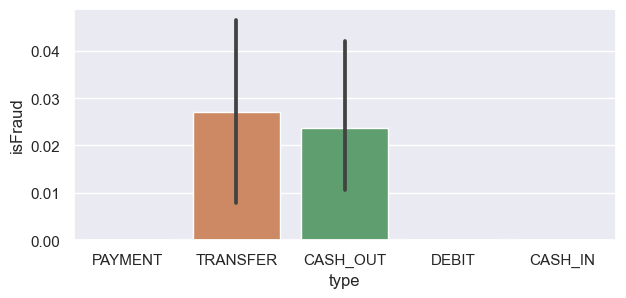

<Figure size 1400x500 with 0 Axes>

In [29]:
sns.barplot(data = df, x ='type', y = 'isFraud')
plt.figure(figsize = (14,5))
plt.tight_layout()
plt.show()

##### This Section deals with Multivariate Analysis. The Pairplot and Heatmap will be looked at.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


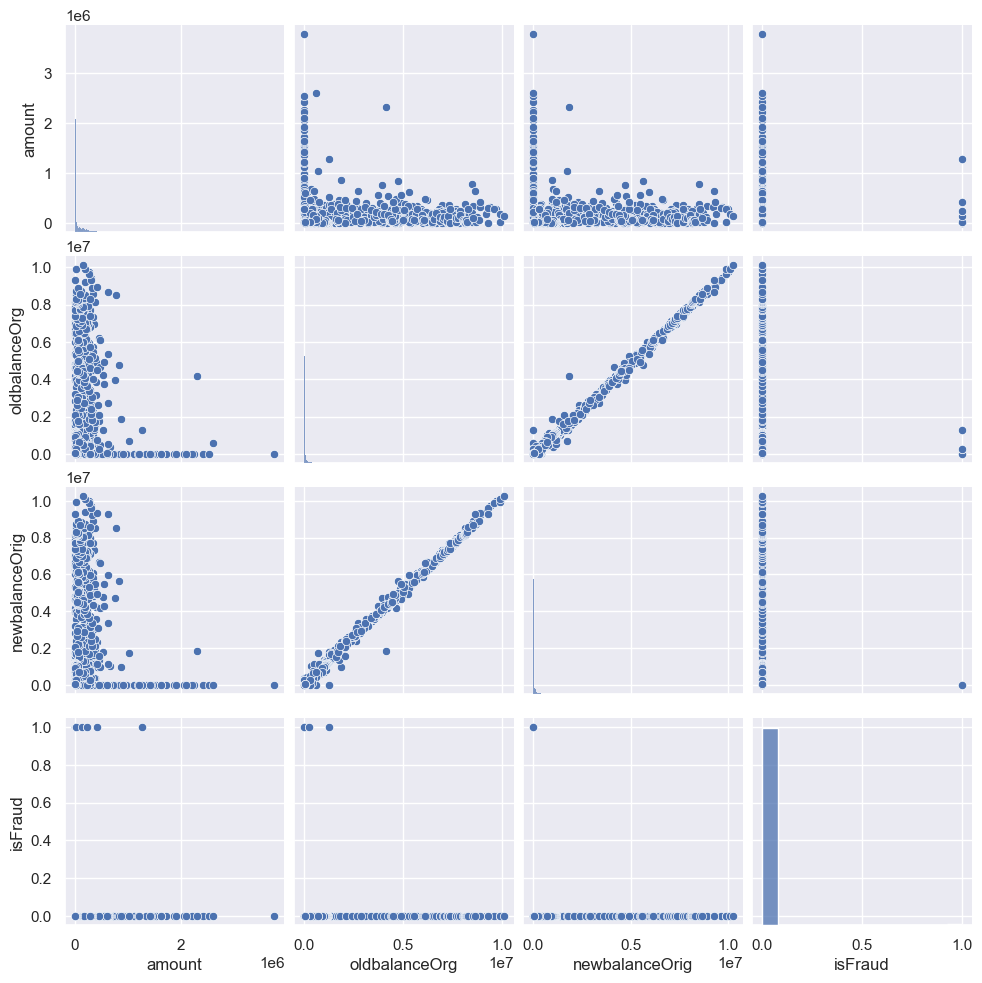

In [30]:
# Pairplot
sns.pairplot(data = df)

In [31]:
my_df= df.select_dtypes(exclude = [object])

<Axes: >

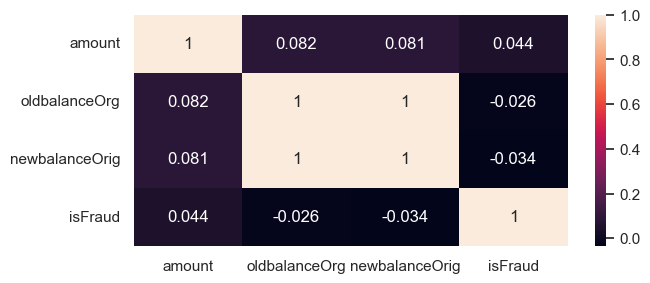

In [32]:
sns.heatmap(my_df.corr(), annot = True, cbar = True)

###### This section deals with data preprocessing for Machine learning¶

In [33]:
from scipy.stats import norm, skew
from scipy import stats
import matplotlib.pyplot as plt

C:\Users\user\AppData\Local\Temp\ipykernel_5180\3955740922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


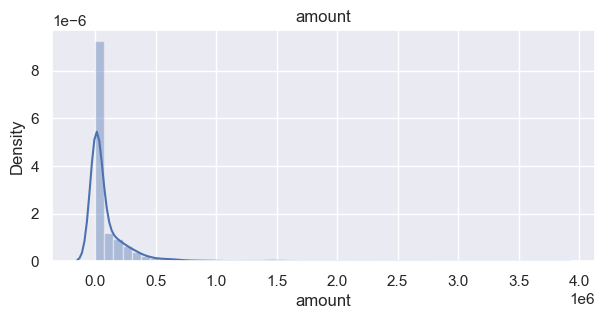

C:\Users\user\AppData\Local\Temp\ipykernel_5180\3955740922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


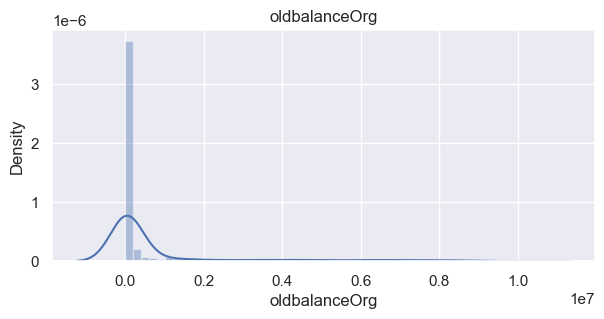

C:\Users\user\AppData\Local\Temp\ipykernel_5180\3955740922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


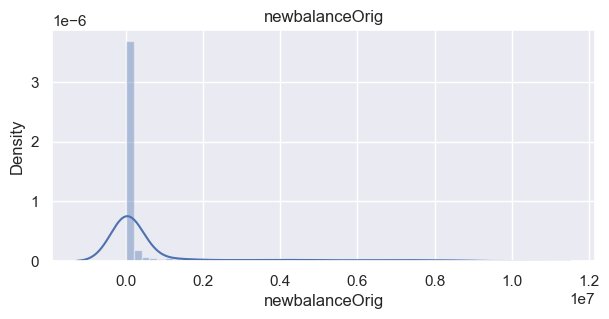

C:\Users\user\AppData\Local\Temp\ipykernel_5180\3955740922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


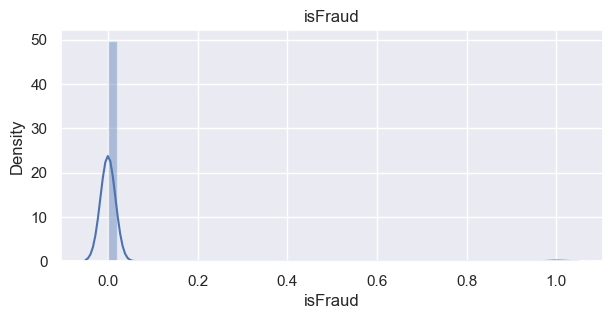

In [34]:
num_features = [num for num in df.columns if df[num].dtypes!='O']
for features in num_features:
        sns.distplot(df[features])
        plt.title(features)
        plt.show()

In [35]:
for features in num_features:
    skew = df[features].skew()
    skew = round(skew, 2)
    print(features,skew)

amount 6.04
oldbalanceOrg 2.66
newbalanceOrig 2.63
isFraud 12.39


In [36]:
# On closer observation the amount, oldbalanceOr and newbalanceOrig are not in the right skewness
# Next is to bring them to proper skweness using the log transformation and pp plot to confirm the operation

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


0.04358233832364337

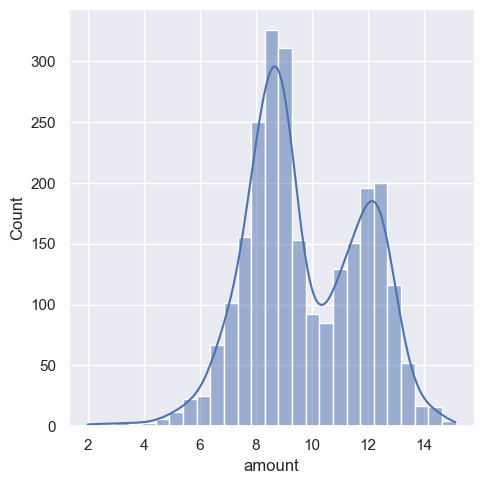

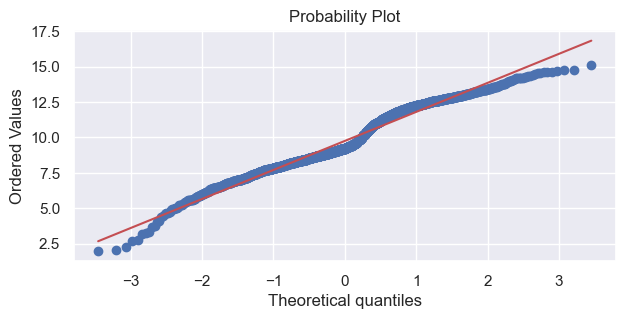

In [37]:
# To transform the amount column
df['amount'] = np.log1p(df['amount'])
sns.displot(df['amount'], kde = True)
fig = plt.figure()
res = stats.probplot(df['amount'], plot = plt)
df['amount'].skew()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


-0.5674137085952429

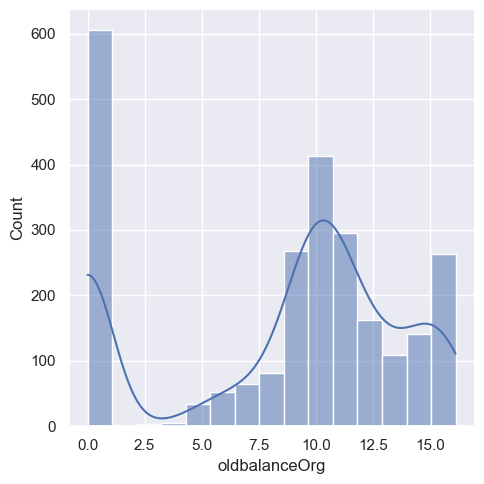

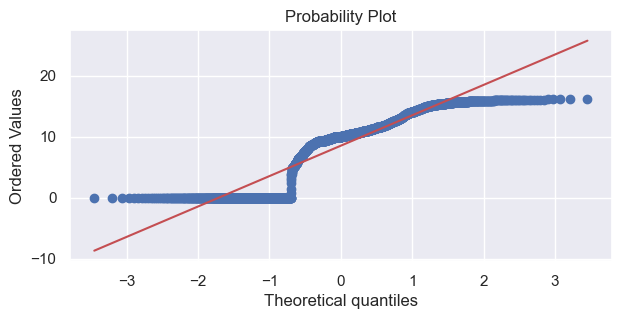

In [38]:
# To transform the oldbalanceOrg column
df['oldbalanceOrg'] = np.log1p(df['oldbalanceOrg'])
sns.displot(df['oldbalanceOrg'], kde = True)
fig = plt.figure()
res = stats.probplot(df['oldbalanceOrg'], plot = plt)
df['oldbalanceOrg'].skew()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


-0.14147862319236953

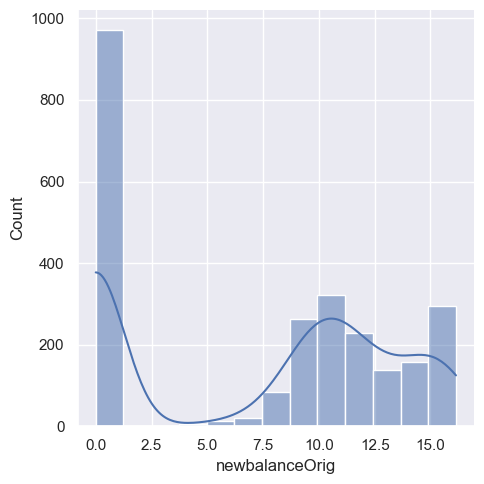

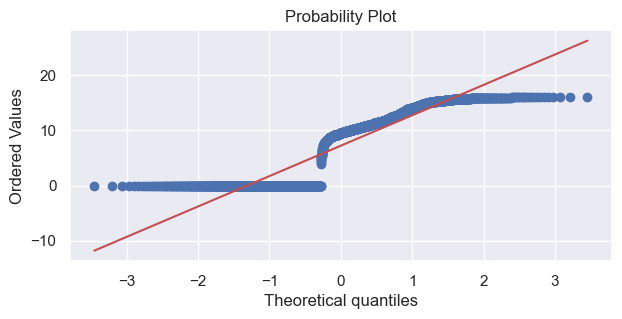

In [39]:
# To transform the newbalanceOrig column
df['newbalanceOrig'] = np.log1p(df['newbalanceOrig'])
sns.displot(df['newbalanceOrig'], kde = True)
fig = plt.figure()
res = stats.probplot(df['newbalanceOrig'], plot = plt)
df['newbalanceOrig'].skew()

In [40]:
# To split the DataFrame before the encoding. Target variable remain untouched

x = df.drop('isFraud', axis = 1)
y = df[['isFraud']]

In [41]:
# To confirm the operation(split)
x.head(2)

,type,amount,oldbalanceOrg,newbalanceOrig
0,PAYMENT,9.194276,12.044359,11.984786
1,PAYMENT,7.531166,9.964112,9.872292


In [42]:
# To confirm the operation (split)
y.head(2)

,isFraud
0,0
1,0


In [43]:
# To encode
x = pd.get_dummies(x,dtype = int)

In [44]:
# To confirm operation
x

,amount,oldbalanceOrg,newbalanceOrig,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9.194276,12.044359,11.984786,0,0,0,1,0
1,7.531166,9.964112,9.872292,0,0,0,1,0
2,5.204007,5.204007,0.000000,0,0,0,0,1
3,5.204007,5.204007,0.000000,0,1,0,0,0
4,9.364703,10.634773,10.305174,0,0,0,1,0
...,...,...,...,...,...,...,...,...
2495,12.529151,6.827629,12.532483,1,0,0,0,0
2496,9.299203,12.532483,12.492260,0,0,0,1,0
2497,9.335759,9.262743,0.000000,0,0,0,1,0
2498,6.829869,9.994196,9.951083,0,0,1,0,0


In [45]:
# Normalization otherwise known as scaling is done on x
# Bring in the library
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler ()
scaled_features = [feature for feature in x.columns]
scaled_data = scaler.fit_transform(x)
x = pd.DataFrame(data = scaled_data, columns = scaled_features)
x

,amount,oldbalanceOrg,newbalanceOrig,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.547187,0.746783,0.742440,0.0,0.0,0.0,1.0,0.0
1,0.420620,0.617802,0.611574,0.0,0.0,0.0,1.0,0.0
2,0.243516,0.322663,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.243516,0.322663,0.000000,0.0,1.0,0.0,0.0,0.0
4,0.560157,0.659385,0.638391,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
2495,0.800981,0.423332,0.776369,1.0,0.0,0.0,0.0,0.0
2496,0.555173,0.777048,0.773878,0.0,0.0,0.0,1.0,0.0
2497,0.557955,0.574315,0.000000,0.0,0.0,0.0,1.0,0.0
2498,0.367249,0.619667,0.616455,0.0,0.0,1.0,0.0,0.0


##### This section deals with Machine Learning

In [47]:
# Nest is to split the dataset into Train and Test set
# Bring in the library
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
# The display of the train_split
x_train

,amount,oldbalanceOrg,newbalanceOrig,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2055,0.805120,0.862856,0.843138,0.0,1.0,0.0,0.0,0.0
1961,0.825986,0.578616,0.000000,0.0,0.0,0.0,0.0,1.0
1864,0.833242,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0
2326,0.439480,0.656924,0.652529,0.0,0.0,0.0,1.0,0.0
461,0.752616,0.903527,0.906852,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1638,0.508723,0.777604,0.775597,0.0,0.0,0.0,1.0,0.0
1095,0.418390,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
1130,0.364042,0.465142,0.423143,0.0,0.0,0.0,1.0,0.0
1294,0.681297,0.955267,0.955152,1.0,0.0,0.0,0.0,0.0


In [50]:
# The display of the train_split
y_train

,isFraud
2055,0
1961,0
1864,0
2326,0
461,0
...,...
1638,0
1095,0
1130,0
1294,0


In [51]:
# Next, is to do cross validation -(Hyperparameter tuning)
# This is to select the best fit classification model for the task
# Bring in the libraries
from sklearn.model_selection import cross_val_score, StratifiedKFold,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np
random_seed = 42
np.random.seed(random_seed)

In [52]:
# Create a list of models to evaluate
models = [('RandomForest', RandomForestClassifier()),
          ('LogisticsRegression', LogisticRegression()),
          ('DecisionTree', DecisionTreeClassifier())]

In [53]:
# Nest, cross validation is performed to evaluate model
results = []
for name,model in models:
    kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=random_seed)
    cv_scores = cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    results.append((name,cv_scores.mean(),cv_scores.std()))

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

In [54]:
for name, mean_score, std_score in results:
    print(f'{name}: Mean Accurracy = {mean_score:.4f}, std = {std_score:.4f}')

RandomForest: Mean Accurracy = 0.9925, std = 0.0016
LogisticsRegression: Mean Accurracy = 0.9935, std = 0.0012
DecisionTree: Mean Accurracy = 0.9920, std = 0.0043


In [55]:
# Nest is to train and test the data
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [56]:
# on seen data
model.score(x_train,y_train)

0.9935

In [57]:
# on unseen data
model.score(x_test,y_test)

0.994

In [58]:
y_test

,isFraud
1447,0
1114,0
1064,0
2287,0
1537,0
...,...
2375,0
1609,0
596,0
84,0


In [59]:
# When x_test is predicted by the model to produce y_test
y_pred = model.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [60]:
# Actual y_test transposed to match the apperance of the predicted outcome
horizontal_array = np.array([y_test]).flatten()
print(horizontal_array)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

##### In evaluating the result of the model score, the following are used:¶
##### Accuracy Score¶
##### Classification Report
##### Classification Matrix

In [61]:
# Accuracy Score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9940


In [62]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       497
           1       0.00      0.00      0.00         3

    accuracy                           0.99       500
   macro avg       0.50      0.50      0.50       500
weighted avg       0.99      0.99      0.99       500



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
# Classification Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[497   0]
 [  3   0]]
